<a href="https://colab.research.google.com/github/Ankur050/CSE326-STAMP-SITE-12112543/blob/main/Ankur_jar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# loading the dataset
data_frame=pd.read_excel("WalmartSales.xlsx")

In [5]:
#seeing top 10 values
data_frame.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
5,699-14-3026,B,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,3/25/2019,18:30:00,Ewallet,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,2/25/2019,14:36:00,Ewallet,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,2/24/2019,11:38:00,Ewallet,8.0
8,665-32-9167,B,Yangon,Member,Female,Health and beauty,36.26,2,1/10/2019,17:15:00,Credit card,7.2
9,692-92-5582,A,Mandalay,Member,Female,Food and beverages,54.84,3,2/20/2019,13:27:00,Credit card,5.9


In [6]:
#checking for null values
print(data_frame.isnull().sum())

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


In [9]:
#converting date column to datetime datatype
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

In [11]:
# A. Analyze the performance of sales and revenue at the city and branch level
data_frame['Total_Sales'] = data_frame['Unit price'] * data_frame['Quantity']
ans_a = data_frame.groupby(['City', 'Branch']).agg({
    'Total_Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()
print(ans_a)

        City Branch  Total_Sales  Quantity
0   Mandalay      A     34130.09       637
1   Mandalay      B     37215.93       664
2   Mandalay      C     29794.62       519
3  Naypyitaw      A     35985.64       648
4  Naypyitaw      B     35157.75       604
5  Naypyitaw      C     34160.14       579
6     Yangon      A     33647.27       598
7     Yangon      B     35193.51       631
8     Yangon      C     32302.43       630


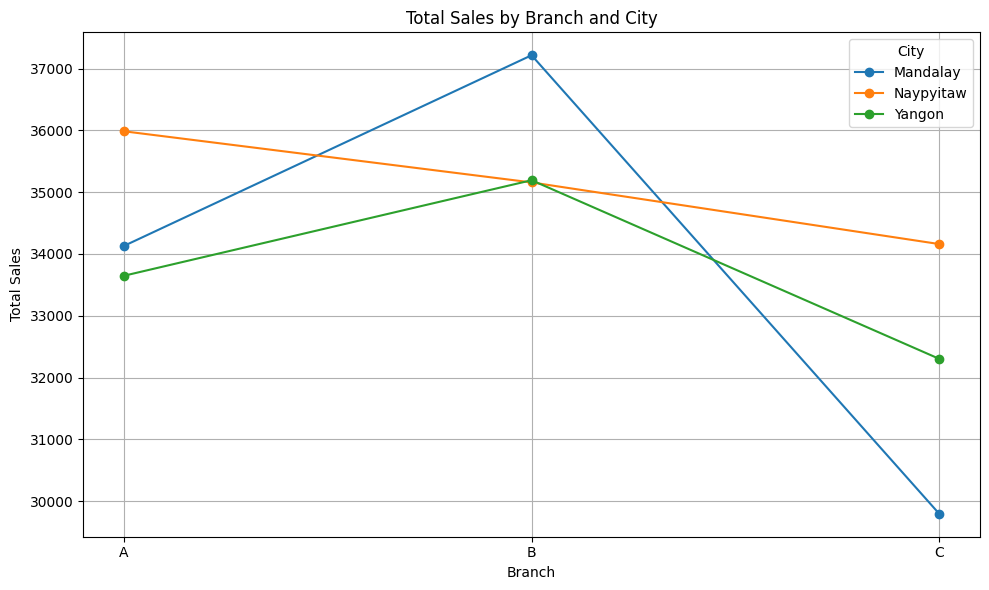

In [15]:
plt.figure(figsize=(10, 6))

# Plotting line chart for each city
for city in ans_a['City'].unique():
    city_data = ans_a[ans_a['City'] == city]
    plt.plot(city_data['Branch'], city_data['Total_Sales'], marker='o', label=city)

plt.title('Total Sales by Branch and City')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()

plt.show()

In [17]:
# B. What is the average price of an item sold at each branch of the city

# Calculating average price per item
data_frame['Price_per_Item'] = data_frame['Total_Sales'] / data_frame['Quantity']
# Grouping it by City and Branch to get the average price per item
ans_b = data_frame.groupby(['City', 'Branch']).agg({
    'Unit price': 'mean'
}).reset_index()

# Display the result
print(ans_b)

        City Branch  Unit price
0   Mandalay      A   53.353866
1   Mandalay      B   56.133305
2   Mandalay      C   57.958316
3  Naypyitaw      A   54.123182
4  Naypyitaw      B   57.785688
5  Naypyitaw      C   57.941009
6     Yangon      A   55.639298
7     Yangon      B   56.011062
8     Yangon      C   52.684602


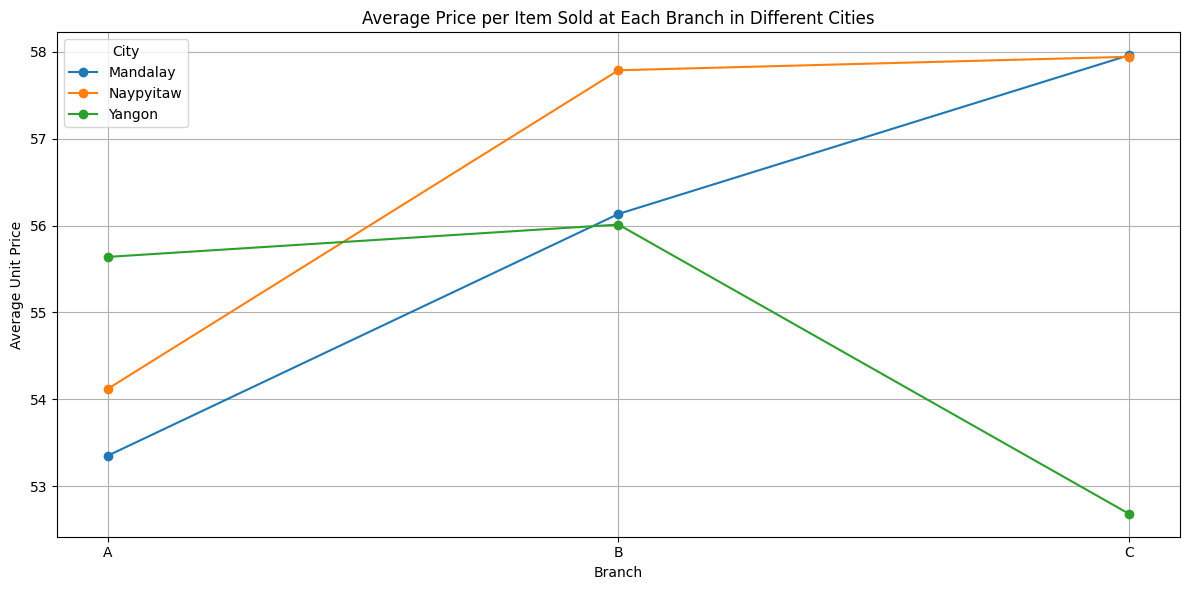

In [20]:
plt.figure(figsize=(12, 6))

# Plotting line chart for each city
for city in ans_b['City'].unique():
    city_data = ans_b[ans_b['City'] == city]
    plt.plot(city_data['Branch'], city_data['Unit price'], marker='o', label=city)

plt.title('Average Price per Item Sold at Each Branch in Different Cities')
plt.xlabel('Branch')
plt.ylabel('Average Unit Price')
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()

plt.show()

In [23]:
#C. Analyze the performance of sales and revenue, Month over Month across the Product line, Gender,
# and Payment Method, and identify the focus areas to get better sales for April 2019. (15 marks):

# Extracting month and year from the Date column
data_frame['Date'] = pd.to_datetime(data_frame['Date'])
data_frame['Month'] = data_frame['Date'].dt.to_period('M')
data_frame['Month_str'] = data_frame['Month'].astype(str)

# Group by Month, Product line, Gender, and Payment method to get sales and revenue
ans_c = data_frame.groupby(['Month_str', 'Product line', 'Gender', 'Payment']).agg({
    'Total_Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

print(ans_c)

    Month_str            Product line  Gender      Payment  Total_Sales  \
0     2019-01  Electronic accessories  Female         Cash      2731.86   
1     2019-01  Electronic accessories  Female  Credit card      3045.42   
2     2019-01  Electronic accessories  Female      Ewallet      1576.48   
3     2019-01  Electronic accessories    Male         Cash      3380.29   
4     2019-01  Electronic accessories    Male  Credit card      2248.65   
..        ...                     ...     ...          ...          ...   
103   2019-03       Sports and travel  Female  Credit card      2863.86   
104   2019-03       Sports and travel  Female      Ewallet      3398.57   
105   2019-03       Sports and travel    Male         Cash      2084.19   
106   2019-03       Sports and travel    Male  Credit card      3633.90   
107   2019-03       Sports and travel    Male      Ewallet      4930.61   

     Quantity  
0          52  
1          54  
2          43  
3          62  
4          43  
.. 

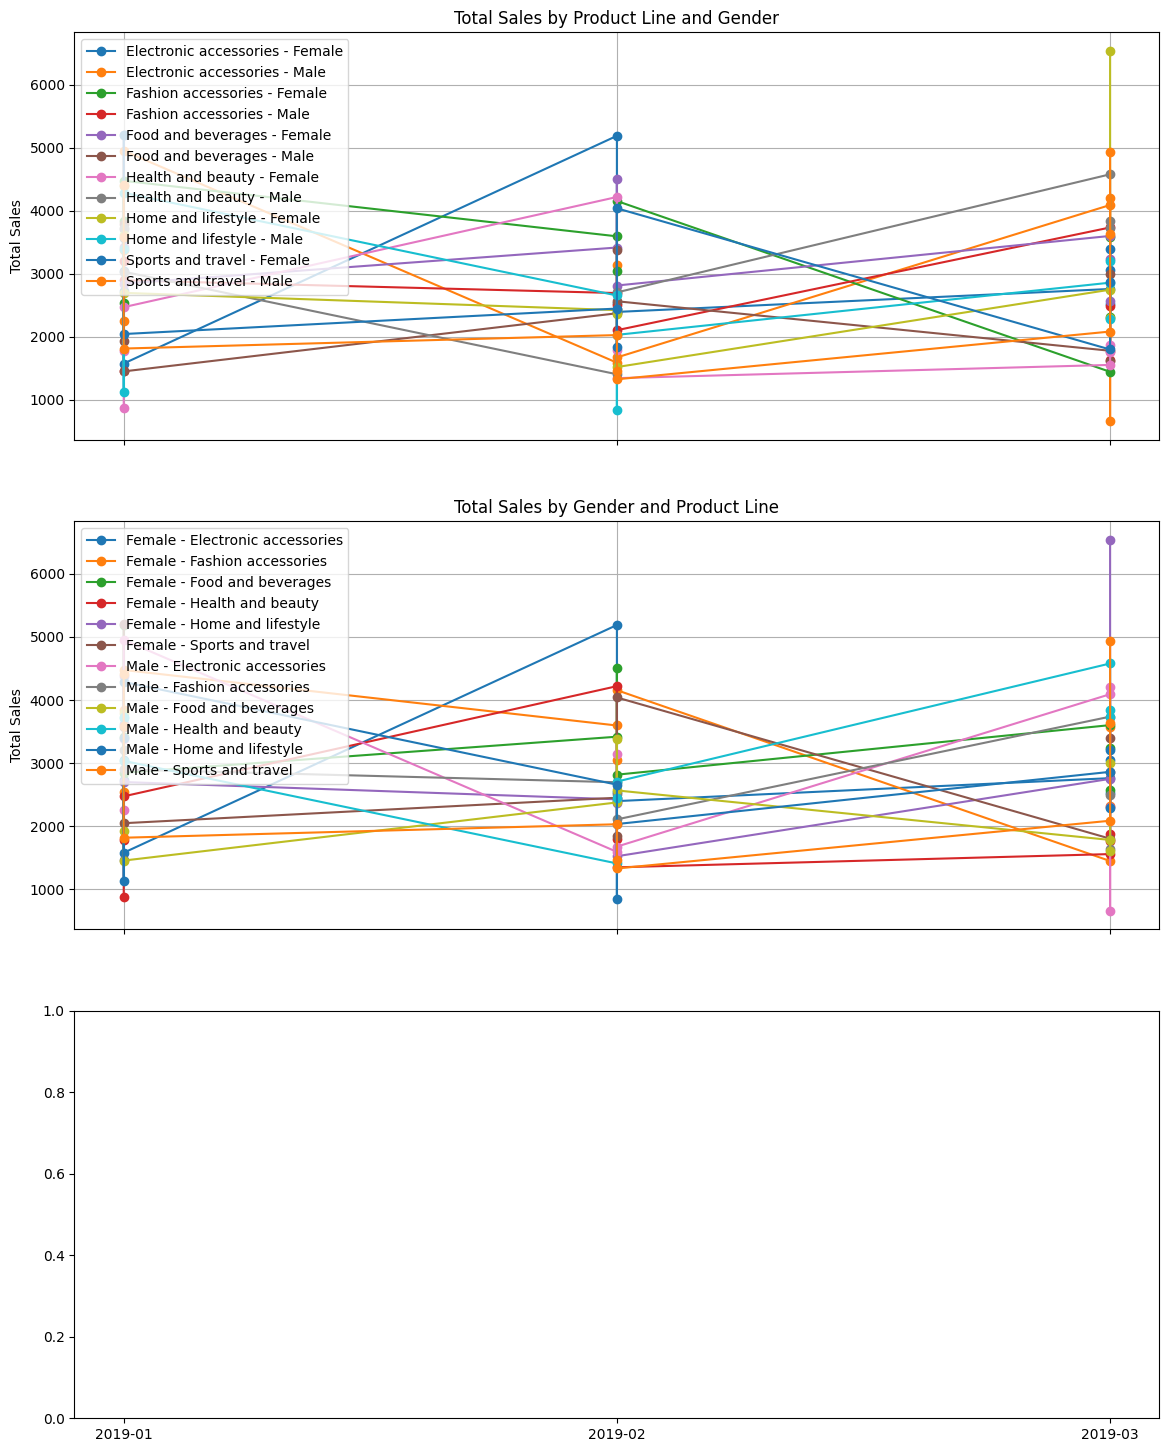

In [26]:

# Create a figure with subplots for different dimensions
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot for Product line
for product_line in ans_c['Product line'].unique():
    product_line_data = ans_c[ans_c['Product line'] == product_line]
    for gender in product_line_data['Gender'].unique():
        gender_data = product_line_data[product_line_data['Gender'] == gender]
        axes[0].plot(gender_data['Month_str'], gender_data['Total_Sales'], marker='o', label=f'{product_line} - {gender}')

axes[0].set_title('Total Sales by Product Line and Gender')
axes[0].set_ylabel('Total Sales')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot for Gender
for gender in ans_c['Gender'].unique():
    gender_data = ans_c[ans_c['Gender'] == gender]
    for product_line in gender_data['Product line'].unique():
        product_line_data = gender_data[gender_data['Product line'] == product_line]
        axes[1].plot(product_line_data['Month_str'], product_line_data['Total_Sales'], marker='o', label=f'{gender} - {product_line}')

axes[1].set_title('Total Sales by Gender and Product Line')
axes[1].set_ylabel('Total Sales')
axes[1].legend(loc='upper left')
axes[1].grid(True)

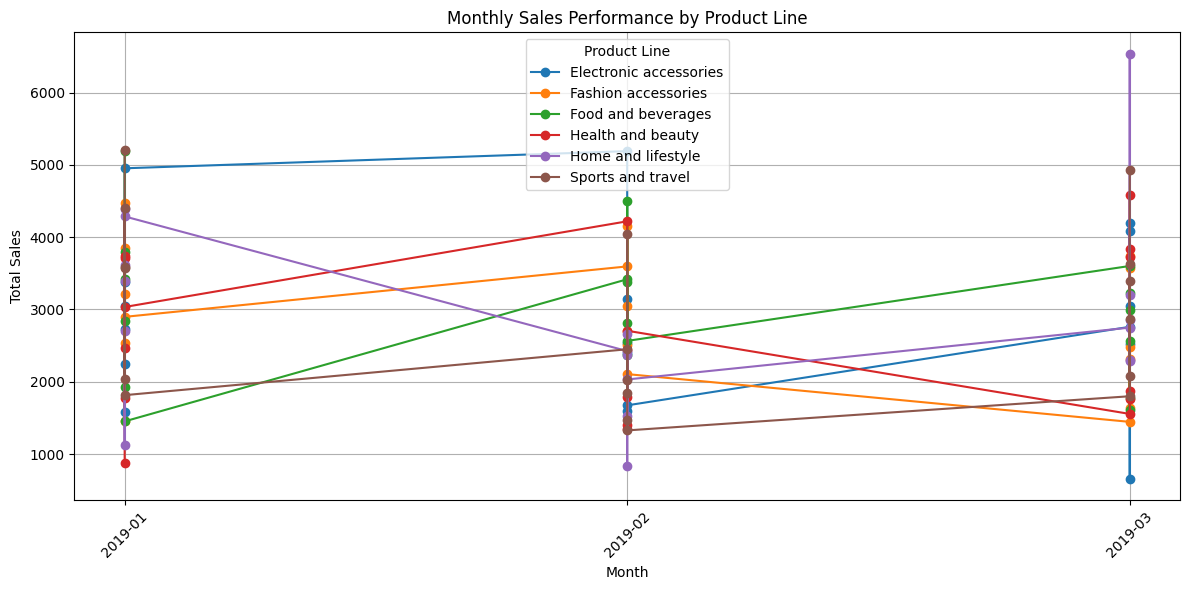

In [29]:
# Plot Monthly Sales Performance by Product Line
plt.figure(figsize=(12, 6))

for product_line in ans_c['Product line'].unique():
    product_line_data = ans_c[ans_c['Product line'] == product_line]
    plt.plot(product_line_data['Month_str'], product_line_data['Total_Sales'], marker='o', label=product_line)

plt.title('Monthly Sales Performance by Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

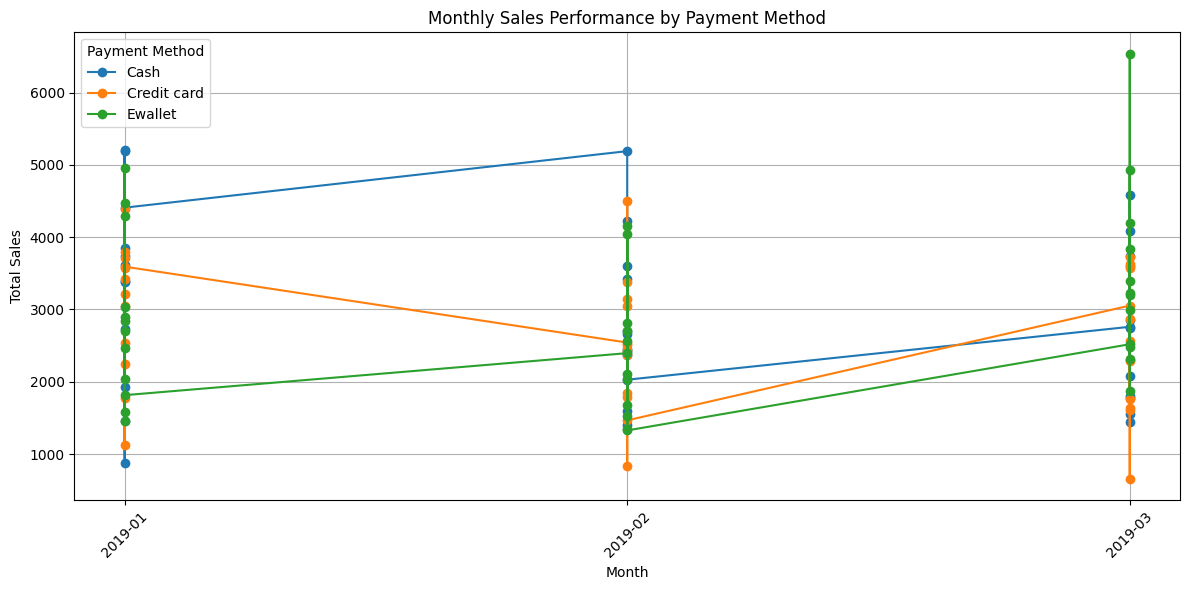

In [31]:
# Plot Monthly Sales Performance by Payment Method
plt.figure(figsize=(12, 6))

for payment_method in ans_c['Payment'].unique():
    payment_method_data = ans_c[ans_c['Payment'] == payment_method]
    plt.plot(payment_method_data['Month_str'], payment_method_data['Total_Sales'], marker='o', label=payment_method)

plt.title('Monthly Sales Performance by Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Payment Method')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()